In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# b.	Data Loading / Preprocessing (10 points)
i.	Loading (2 points)
1.	Load the data <BankChurn.csv> as a pandas dataframe using the `pd.read_csv()` function which returns a dataframe , store this value in a variable named ‘df’.

2.	The resulting dataframe should have the shape (10000,14) indicating that there are 10000 instances and 14 columns. 

3.	In this dataframe, currently you have 9 features which are the following: RowNumber, CustomerID, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary. Using the ‘pandas.dataframe.drop’ function to drop the RowNumber, CustomerID and Surname columns.

4.	Using the ‘pandas.isnull()’ function check if there are any missing values in the dataframe and report this value (i.e., the number of missing values per column of the dataframe).

5.	Your task is to use feature columns to predict the target column (which is categorical in our case). This can be cast as a classification problem. 

6.	Create a dataframe X of features (by dropping the ‘Exited’ column from the original dataframe). Create a Pandas Series object of targets Y (by only considering the ‘Exited’ column from the original dataframe). Moving forward, we will be working with X and Y.


In [2]:
df = pd.read_csv('churn.csv')
df.shape

(10000, 14)

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [5]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
X = df.drop('Exited', axis=1)
Y = df['Exited']

# ii.	Data Visualization  (4 points)
1.	Visualize the distribution of the ‘Age’ and ‘CreditScore’ column using the ‘matplotlib.pyplot.hist’ function as two separate plots. Label the x-axis and the y-axis along with giving the plot a title and assign a bin size of 7. 
a.	What are the respective mean values of these two features (use the pandas.DataFrame.mean() function)?

b.	What is the respective standard deviation of these two features (use the pandas.DataFrame.std() function)? 


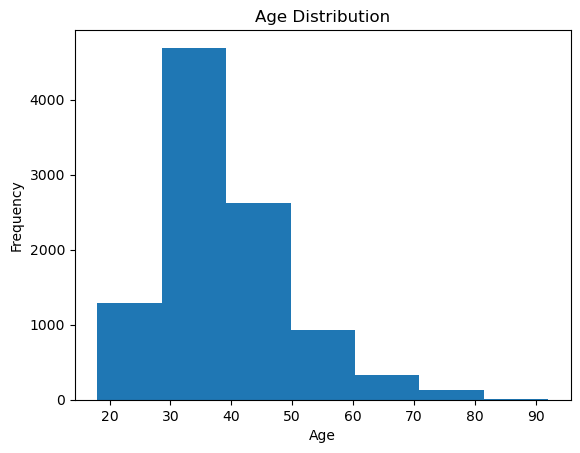

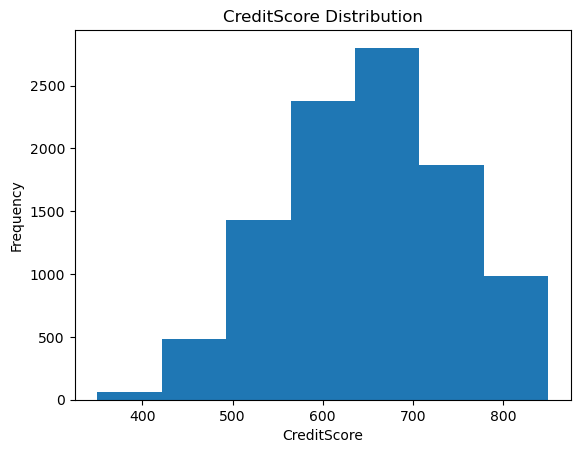

In [7]:
# Create histogram for Age column
plt.hist(df['Age'], bins=7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Create histogram for CreditScore column
plt.hist(df['CreditScore'], bins=7)
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.title('CreditScore Distribution')
plt.show()

In [8]:
df[['Age','CreditScore']].mean()

Age             38.9218
CreditScore    650.5288
dtype: float64

In [9]:
df[['Age','CreditScore']].std()

Age            10.487806
CreditScore    96.653299
dtype: float64

2.	Only for this question use the dataframe consisting of the target variable (initialized as ‘df’). Using matplotlib visualize the number of males and females in each country who are active members and not active members. (Visualize this using a barchart. You will need to use the ‘Gender’, ‘Geography’ and ‘IsActiveMember’ features for this question). Visualize these graphs on two separate plots with respect to their active status. To create a barchart using matplotlib use the ‘matplotlib.pyplot.bar()’ function. Also label the x-axis, y-axis and give the plots a title. 



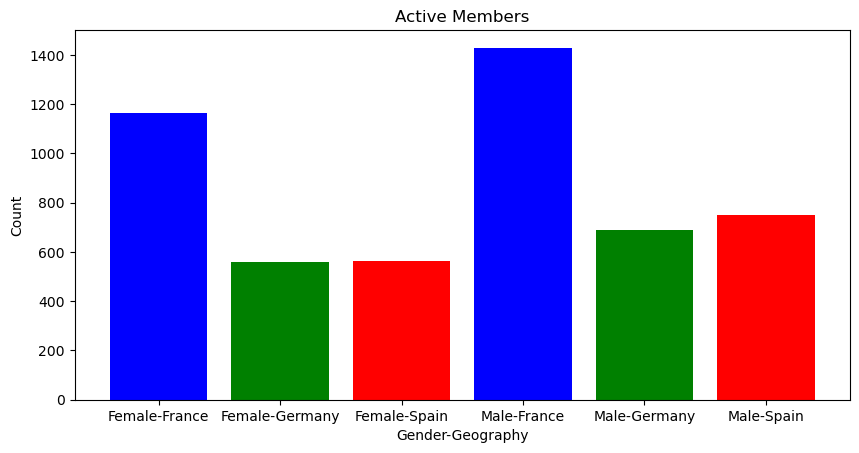

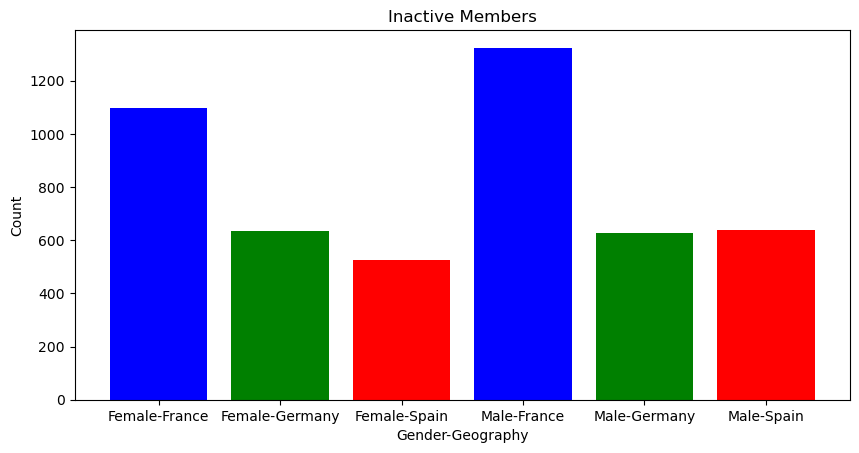

In [10]:
# Create barchart for active members
active = df[df['IsActiveMember']==1]

# Group by Gender and Geography
active_grouped = active.groupby(['Gender','Geography'])

# Get the count of each group
active_count = active_grouped.size().reset_index(name='count')

# Create barchart for inactive members
inactive = df[df['IsActiveMember']==0]

# Group by Gender and Geography
inactive_grouped = inactive.groupby(['Gender','Geography'])

# Get the count of each group
inactive_count = inactive_grouped.size().reset_index(name='count')

# Create barchart for active members
plt.figure(figsize = [10, 4.8])
plt.bar(active_count['Gender'] + '-' + active_count['Geography'], active_count['count'], color=['b','g','r'])
plt.xlabel('Gender-Geography')
plt.ylabel('Count')
plt.title('Active Members')
plt.show()

# Create barchart for inactive members
plt.figure(figsize = [10, 4.8])
plt.bar(inactive_count['Gender'] + '-' + inactive_count['Geography'], inactive_count['count'], color=['b','g','r'])
plt.xlabel('Gender-Geography')
plt.ylabel('Count')
plt.title('Inactive Members')
plt.show()


a.	How many males are from France and are active members?


In [11]:
df[(df['Gender'] == 'Male') & (df['Geography'] == 'France') & (df['IsActiveMember'] == 1)].shape[0]


1429

b.	How many females are from Spain and are active members?


In [12]:
df[(df['Gender'] == 'Female') & (df['Geography'] == 'Spain') & (df['IsActiveMember'] == 1)].shape[0]


563

c.	How many males are from France or Germany who are not active members?

In [13]:
df[(df['Gender'] == 'Male') & ((df['Geography'] == 'France') | (df['Geography'] == 'Germany')) & (df['IsActiveMember'] == 0)].shape[0]


1951


3.	Using the target variable in Y plot a bar chart showing the distribution of the ‘Exited’ column (To create a barchart using matplotlib use the ‘matplotlib.pyplot.bar()’ function).

a.	What can be said about this distribution (specifically keeping in mind this distribution represents the target variable) will this have an impact on the results of the classification model? 


Text(0.5, 1.0, 'Exited Distribution')

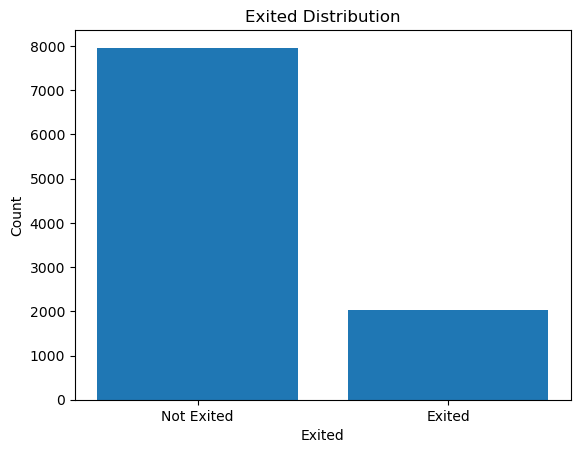

In [14]:
plt.bar(['Not Exited','Exited'], [Y.value_counts()[0], Y.value_counts()[1]])
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Exited Distribution')

We can see that there are more not exited than exited. This may have an impact on the results of the classification model, as a classifier may have a tendency to predict the majority class more often than the minority class. This may lead to a bias in the predictions and could potentially affect the performance of the model.

4.	So far you should have successfully been able to load, preprocess and visualize your data. Now, use the ‘pd.get_dummies()’ function to convert categorical data into dummy variables (‘Gender’ and ‘Geography’). (Perform this only on X).

a.	What is the shape of X?


In [15]:
# Convert categorical data to dummy variables
X = pd.get_dummies(X, columns=['Gender', 'Geography'])

print(f'The shape of X is: {X.shape}')

The shape of X is: (10000, 13)


# iii.	Data Splitting (1 point)
1.	Split data into training and test sets using the sklearn ‘train_test_split() function in a 80:20 ratio. The result of your data split should be X_train, X_test, y_train, y_test. (Respectively your training features, testing features, training targets and testing target arrays).



In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# iv.	Data Scaling (3 points)
1.	Employ the ‘MinMaxScaler’  function on the continuous attributes in X_train. Employ the ‘fit_transform()’ function of the scaler to retrieve the new (scaled) version of the training data (i.e., fit_transform() should be run on `X_train`). Store the result in X_train again.
2.	Scale the X_test data using the scaler you have just fit, this time using the `transform()` function. Note: store the scaled values back into X_test.  At the end of this step, you must have X_train, X_test, scaled according to the MinMaxScaler.



In [17]:
X_train.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Gender_Female          uint8
Gender_Male            uint8
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [18]:
from sklearn.preprocessing import MinMaxScaler

continuous_attributes = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

# Create scaler
scaler = MinMaxScaler()

# Scale continuous attributes
X_train[continuous_attributes] = scaler.fit_transform(X_train[continuous_attributes])
X_test[continuous_attributes] = scaler.transform(X_test[continuous_attributes])

# c.	Modelling (10 points)
# i.	(2 points) Modeling (Model Instantiation / Training) using Logistic Regression classifier

1.	Employ the Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_1_lr’

2.	Once instantiated, `fit()` the model using the scaled X_train, y_train data.

3.	Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

4.	Employ the ‘accuracy_score()’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model 


In [19]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model_1_lr = LogisticRegression()

In [20]:
model_1_lr.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred_lr = model_1_lr.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

# Calculate accuracy of Logistic Regression model
print(accuracy_score(y_pred_lr, y_test))

0.8125


# ii.	(2 points) Modeling (Model Instantiation / Training) using Support Vector Machine Classifier
1.	Employ the Support Vector Machine (SVM) classifier from sklearn and instantiate the model. Label this model as ‘model_2_svm’

2.	Once instantiated, ‘fit()’ the model using the scaled X_train, y_train data.

3.	Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_svm’. 

4.	Employ the ‘accuracy_score’ function (‘sklearn.metrics.accuracy()’ function) by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the SVM model.


In [23]:
from sklearn.svm import SVC

model_2_svm = SVC()

model_2_svm.fit(X_train, y_train)
y_pred_svm = model_2_svm.predict(X_test)

# Calculate accuracy of SVM model
print(accuracy_score(y_pred_svm, y_test))

0.841


# iii.	(2 points) Modeling Logistic Regression Classifier on a balanced dataset
1.	Employ Synthetic Minority Oversampling on X_train and y_train. To use SMOTE you will have to install the imbalanced-learn library, this can either be down by executing the following command ‘pip install -U imbalanced-learn’ command ‘conda install -c conda-forage imbalanced-learn’ command for the Anaconda Cloud platform. (For more information click the following link: https://imbalanced-learn.org/stable/install.html). 
Import the ‘SMOTE’ function from the ‘imblearn.over_sampling’. Use the ‘smote.refit_resample()’ function on X_train and y_train using its default parameters. Store them in X_train_smote, y_train_smote. - Be careful to employ SMOTE ONLY on the training data and not on the full dataset because that can cause inadvertent “data leakage” (please see: https://arxiv.org/pdf/2107.00079.pdf for details) . 

2.	Employ a new Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_3_smote_lr’

3.	Once instantiated, ‘fit()’ the model using the balanced X_train_smote, y_train_smote data.

4.	Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_smote_lr’. 

5.	Employ the ‘accuracy_score’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the new Logistic Regression model.

a.	What is your initial observation of the accuracy of model_3_smote_lr vs. accuracy of model_1_lr? What could be the reasoning for (any possible) change in accuracy?



In [24]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Oversample X_train and y_train using SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model_3_smote_lr = LogisticRegression()
model_3_smote_lr.fit(X_train_smote, y_train_smote)
y_pred_smote_lr = model_3_smote_lr.predict(X_test)

print(accuracy_score(y_pred_smote_lr, y_test))

0.722


The accuracy of model_1_lr larger than accuracy of model_3_smote_lr. The use of Synthetic Minority Oversampling on the training data may have oversimplified the data and led to a less accurate model compared to model_1_lr.

# iv.	(2 points) Modeling SVM on a balanced dataset
1.	Employ Synthetic Minority Oversampling on X_train and y_train. Import the ‘SMOTE’ function from the ‘imblearn.over_sampling’. Use the ‘smote.refit_resample()’ function on X_train and y_train. Store them in X_train_smote, y_train_smote.

a.	At the end of this step, your new training set i.e., (X_train_smote , y_train_smote) should have the same number of instances for each of the two classes.

2.	Employ a new SVM classifier from sklearn and instantiate the model. Label this model as ‘model_4_smote_svm’

3.	Once instantiated, ‘fit()’ the model using the balanced X_train_smote, y_train_smote data.

4.	Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_smote_svm’. 

5.	Employ the ‘accuracy_score’ function (‘sklearn.metrics.accuracy()’ function) by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the new SVM model.

a.	What is your initial observation of the accuracy of model_4_smote_svm vs. accuracy of model_2_svm? What could be the reasoning for (any possible) change in accuracy?


In [25]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(12712, 13)
(12712,)


In [26]:
model_4_smote_svm = SVC()
model_4_smote_svm.fit(X_train_smote, y_train_smote)
y_pred_smote_svm = model_4_smote_svm.predict(X_test)

print(accuracy_score(y_pred_smote_svm, y_test))

0.769


The accuracy decrease after employ Synthetic Minority Oversampling. Similarly the use of SMOTE may have oversimplified the data and led to a less accurate model.

# v.	(2 points) Modeling Grid Search Parameter Selection for SVM
1.	We will now be reverting to our X_train and y_train data. Initialize a variable labeled as ‘param_grid’ storing the following: {"gamma": [0.001, 0.01, 0.1], "C": [1,10,100,1000,10000]}.

2.	Employ the gridsearchCV function and initialize the following parameters: estimator = SVC(), param_grid = param_grid, cv=5, verbose =1, scoring = ‘accuracy’

3.	Once instantiated, ‘fit()’ the model using the X_train_smote, y_train_smote data.

4.	Print the best paramaters using the ‘best_params_’ attribute and print the mean cross validated score of the best estimator (hint use the ‘best_score_’ attribute).

5.	Employ the ‘score’ function by using the ‘X_test’ and ‘y_test’ variables as the functions parameters and print the accuracy of the new gridsearch SVM model.SVM model.



In [27]:
param_grid = {"gamma": [0.001, 0.01, 0.1], "C": [1,10,100,1000,10000]}

In [28]:
from sklearn.model_selection import GridSearchCV

# Initialize grid search cross-validation function
grid_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

In [29]:
# Fit model using X_train_smote and y_train_smote
grid_svm.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [0.001, 0.01, 0.1]},
             scoring='accuracy', verbose=1)

In [30]:
# Print best parameters
print(grid_svm.best_params_)

# Print mean cross-validated score of best estimator
print(grid_svm.best_score_)


{'C': 10000, 'gamma': 0.1}
0.8237899629132654


In [31]:
# Calculate accuracy of grid search SVM model
accuracy = grid_svm.score(X_test, y_test)
print(accuracy)


0.7695


# d.	Evaluation (5 points)
i.	(2 points) Calculate F1 Score, Precision, Recall, Accuracy (All on the test set X_test, y_test)
1.	Employ the `classification_report()` function from sklearn.metrics to report the precision recall, f1 score and accuracy for each class for the first four models (parts c.i – c.iv). 

ii.	(2 points) Visualize a confusion matrix for the first four models
1.	Employ the `confusion_matrix()` function from sklearn.metrics to report the confusion matrix results.

2.	Report the False Negative and False Positive values for model_1_lr.



In [32]:
from sklearn.metrics import classification_report

# Generate classification report for model_1_lr
print('Model 1 (Logistic Regression):')
print(classification_report(y_test, y_pred_lr))

# Generate classification report for model_2_svm
print('Model 2 (SVM):')
print(classification_report(y_test, y_pred_svm))

# Generate classification report for model_3_smote_lr
print('Model 3 (SMOTE + Logistic Regression):')
print(classification_report(y_test, y_pred_smote_lr))

# Generate classification report for grid_svm
print('Model 4 (Grid Search SVM):')
print(classification_report(y_test, grid_svm.predict(X_test)))


Model 1 (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Model 2 (SVM):
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1607
           1       0.85      0.23      0.36       393

    accuracy                           0.84      2000
   macro avg       0.85      0.61      0.64      2000
weighted avg       0.84      0.84      0.80      2000

Model 3 (SMOTE + Logistic Regression):
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.39      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65

In [33]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for model_1_lr
cm_1_lr = confusion_matrix(y_test, y_pred_lr)
print('Model 1 (Logistic Regression)')
print(cm_1_lr)

# Generate confusion matrix for model_2_svm
cm_2_svm = confusion_matrix(y_test, y_pred_svm)
print('Model 2 (SVM)')
print(cm_2_svm)

# Generate confusion matrix for model_3_smote_lr
cm_3_smote_lr = confusion_matrix(y_test, y_pred_smote_lr)
print('Model 3 (SMOTE + Logistic Regression)')
print(cm_3_smote_lr)

# Generate confusion matrix for grid_svm
cm_4_grid_svm = confusion_matrix(y_test, grid_svm.predict(X_test))
print('Model 4 (Grid Search SVM)')
print(cm_4_grid_svm)


Model 1 (Logistic Regression)
[[1550   57]
 [ 318   75]]
Model 2 (SVM)
[[1591   16]
 [ 302   91]]
Model 3 (SMOTE + Logistic Regression)
[[1165  442]
 [ 114  279]]
Model 4 (Grid Search SVM)
[[1269  338]
 [ 123  270]]


In [34]:
# Report the False Negative and False Positive values for model_1_lr.
fn_1_lr = cm_1_lr[0, 1]
fp_1_lr = cm_1_lr[1, 0]

print('False Negative:', fn_1_lr)
print('False Positive:', fp_1_lr)


False Negative: 57
False Positive: 318


iii.	(1 point) Report the best F1 score of the grid search implemented in the fifth model (part c.v). Also report the best parameters from the grid search on the training set. 

In [35]:
grid_svm_f1 = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, verbose=1, scoring='f1')
grid_svm.fit(X_train_smote, y_train_smote)
# Print best parameters
print(grid_svm.best_params_)

# Print best F1 score
print(grid_svm.best_score_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'C': 10000, 'gamma': 0.1}
0.8237899629132654


# e.	Discussion 

iii.	(2 points) Discuss the advantages and disadvantages between oversampling and under-sampling. Use the following article to help you formulate your answer and reasoning. (https://www.mastersindatascience.org/learning/statistics-data-science/undersampling/) 




The main advantage of undersampling is that data scientists can correct imbalanced data to reduce the risk of their analysis or machine learning algorithm skewing toward the majority. Other advantages of undersampling include less storage requirements and better run times for analyses. Less data means businesses need less storage and time to gain valuable insights. 

One of disadvantages undersampling is, data scientists or the machine learning algorithm removes data from the majority class. Because of this, scientists can lose potentially important information. Another disadvantage of undersampling is that the sample of the majority class chosen could be biased.

One of advantages of oversampling is it doesn’t lead to any loss of information, and in some cases, may perform better than undersampling. But oversampling also has a disadvantage that it often involves replicating minority events, it can lead to overfitting. 

iv.	(2 points) From the results of the grid-search, comment on importance of the gamma parameter on SVM performance. What effect will the gamma value have if it is too big or too small?

The importance of the gamma parameter in a grid search lies in its ability to help identify the optimal value of gamma for SVM model.If the gamma value is too large, the model will have too much influence from each training example and will overfit the data. This can lead to poor generalization and suboptimal performance on new data. On the other hand, if the gamma value is too small, the model will not have enough influence from each training example and will underfit the data. This can lead to a lack of accuracy and poor performance on the training data as well.